# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

602

In [3]:
#printing response from the first city
url_base = "http://api.openweathermap.org/data/2.5/weather?q="
city1 = cities[0]
url_city = url_base + city1 + "&appid=" + weather_api_key
    
print(f'Testing response from {city1}:')

    
response = requests.get(url_city).json()

print(response)

Testing response from dunedin:
{'coord': {'lon': 170.5, 'lat': -45.87}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 281.48, 'feels_like': 279.54, 'temp_min': 281.48, 'temp_max': 281.48, 'pressure': 1032, 'humidity': 83}, 'visibility': 10000, 'wind': {'speed': 1.34, 'deg': 36, 'gust': 2.24}, 'clouds': {'all': 0}, 'dt': 1599510025, 'sys': {'type': 3, 'id': 75281, 'country': 'NZ', 'sunrise': 1599504883, 'sunset': 1599545827}, 'timezone': 43200, 'id': 2191562, 'name': 'Dunedin', 'cod': 200}


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
record_count = 1
set_count = 1
url_base = "http://api.openweathermap.org/data/2.5/weather?q="

#the lists that will be created from the api calls
city_list = []
country_list = []
lng_list = []
lat_list = []
temp_list = []
humidity_list = []
clouds_list = []
wind_list = []


print(f'Beginning Data Retrieval \n -----------------------------')
for city in cities:
    url_city = url_base + city + "&appid=" + weather_api_key
    
    print(f'Processing Record {record_count} of Set {set_count} | {city}')
    
    record_count = record_count + 1
    
    response = requests.get(url_city).json()
    
    #if city not found
    if response["cod"] == "404":
        print(f'City not found. Skipping...')
        
    #city is found, adding the response data to lists
    else:
        city_list.append(city)
        country_list.append(response["sys"]["country"])
        lng_list.append(response["coord"]["lon"])
        lat_list.append(response["coord"]["lat"])
        temp_list.append(response["main"]["temp_max"])
        humidity_list.append(response["main"]["humidity"])
        clouds_list.append(response["clouds"]["all"])
        wind_list.append(response["wind"]["speed"])
    
    #new set
    if record_count == 49:
        set_count = set_count + 1
        record_count = 1

Beginning Data Retrieval 
 -----------------------------
Processing Record 1 of Set 1 | dunedin
Processing Record 2 of Set 1 | ronne
Processing Record 3 of Set 1 | cape town
Processing Record 4 of Set 1 | punta arenas
Processing Record 5 of Set 1 | hilo
Processing Record 6 of Set 1 | kapaa
Processing Record 7 of Set 1 | busselton
Processing Record 8 of Set 1 | ushuaia
Processing Record 9 of Set 1 | albany
Processing Record 10 of Set 1 | bereda
Processing Record 11 of Set 1 | bluff
Processing Record 12 of Set 1 | vaxjo
Processing Record 13 of Set 1 | guiberoua
Processing Record 14 of Set 1 | hofn
Processing Record 15 of Set 1 | new norfolk
Processing Record 16 of Set 1 | georgetown
Processing Record 17 of Set 1 | saskylakh
Processing Record 18 of Set 1 | maceio
Processing Record 19 of Set 1 | talcahuano
Processing Record 20 of Set 1 | rikitea
Processing Record 21 of Set 1 | road town
Processing Record 22 of Set 1 | airai
Processing Record 23 of Set 1 | chuy
Processing Record 24 of Set 1

Processing Record 47 of Set 4 | pisco
Processing Record 48 of Set 4 | kirakira
Processing Record 1 of Set 5 | manta
Processing Record 2 of Set 5 | port-gentil
Processing Record 3 of Set 5 | bavly
Processing Record 4 of Set 5 | vallenar
Processing Record 5 of Set 5 | nabire
Processing Record 6 of Set 5 | khatanga
Processing Record 7 of Set 5 | sangar
Processing Record 8 of Set 5 | monchegorsk
Processing Record 9 of Set 5 | isangel
Processing Record 10 of Set 5 | balkanabat
Processing Record 11 of Set 5 | napasar
Processing Record 12 of Set 5 | sisimiut
Processing Record 13 of Set 5 | kruisfontein
Processing Record 14 of Set 5 | ossora
Processing Record 15 of Set 5 | amapa
Processing Record 16 of Set 5 | seguin
Processing Record 17 of Set 5 | pangnirtung
Processing Record 18 of Set 5 | goderich
Processing Record 19 of Set 5 | alta floresta
Processing Record 20 of Set 5 | plettenberg bay
Processing Record 21 of Set 5 | liverpool
Processing Record 22 of Set 5 | liepaja
Processing Record 23

Processing Record 33 of Set 12 | pamplona
Processing Record 34 of Set 12 | guerrero negro
Processing Record 35 of Set 12 | mahon
Processing Record 36 of Set 12 | derbent
Processing Record 37 of Set 12 | hyeres
Processing Record 38 of Set 12 | tocache
Processing Record 39 of Set 12 | bilma
Processing Record 40 of Set 12 | slave lake
Processing Record 41 of Set 12 | antofagasta
Processing Record 42 of Set 12 | glasgow
Processing Record 43 of Set 12 | rognan
Processing Record 44 of Set 12 | colares
Processing Record 45 of Set 12 | oktyabrskiy
Processing Record 46 of Set 12 | kerema
Processing Record 47 of Set 12 | kuusamo
Processing Record 48 of Set 12 | chapais
Processing Record 1 of Set 13 | samusu
City not found. Skipping...
Processing Record 2 of Set 13 | biak
Processing Record 3 of Set 13 | ivanjica
Processing Record 4 of Set 13 | zaraza
Processing Record 5 of Set 13 | boa vista
Processing Record 6 of Set 13 | hammerfest
Processing Record 7 of Set 13 | deputatskiy
Processing Record 8

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [9]:
cities_df = pd.DataFrame({
    "City": city_list,
    "Country": country_list,
    "Lng" : lng_list,
    "Lat" : lat_list,
    "Max Temp" : temp_list,
    "Humidity" : humidity_list,
    "Cloudiness" : clouds_list,
    "Wind Speed" : wind_list,
})

In [10]:
cities_df

,City,Country,Lng,Lat,Max Temp,Humidity,Cloudiness,Wind Speed
0,dunedin,NZ,170.50,-45.87,281.48,83,0,1.34
1,ronne,DK,14.71,55.10,289.15,72,47,7.70
2,cape town,ZA,18.42,-33.93,289.26,87,0,0.50
3,punta arenas,CL,-70.92,-53.15,279.82,87,100,4.10
4,hilo,US,-155.09,19.73,302.15,62,40,2.10
...,...,...,...,...,...,...,...,...
542,erzincan,TR,39.50,39.75,296.15,35,0,4.60
543,poronaysk,RU,143.12,49.22,288.28,84,100,1.28
544,cidreira,BR,-50.21,-30.18,287.50,92,100,7.75
545,lerwick,GB,-1.15,60.15,286.15,82,3,10.80


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [11]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_cities_df = cities_df.loc[cities_df["Humidity"] <= 100]
clean_cities_df

,City,Country,Lng,Lat,Max Temp,Humidity,Cloudiness,Wind Speed
0,dunedin,NZ,170.50,-45.87,281.48,83,0,1.34
1,ronne,DK,14.71,55.10,289.15,72,47,7.70
2,cape town,ZA,18.42,-33.93,289.26,87,0,0.50
3,punta arenas,CL,-70.92,-53.15,279.82,87,100,4.10
4,hilo,US,-155.09,19.73,302.15,62,40,2.10
...,...,...,...,...,...,...,...,...
542,erzincan,TR,39.50,39.75,296.15,35,0,4.60
543,poronaysk,RU,143.12,49.22,288.28,84,100,1.28
544,cidreira,BR,-50.21,-30.18,287.50,92,100,7.75
545,lerwick,GB,-1.15,60.15,286.15,82,3,10.80


In [12]:
# Export the City_Data into a csv
clean_cities_df.to_csv("cities.csv")

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

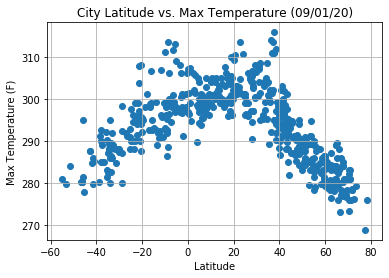

In [13]:
plt.scatter(clean_cities_df["Lat"],clean_cities_df["Max Temp"])
plt.title("City Latitude vs. Max Temperature (09/01/20)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(linestyle="-")
plt.savefig("lat_temp_fig")
plt.show()

## Latitude vs. Humidity Plot

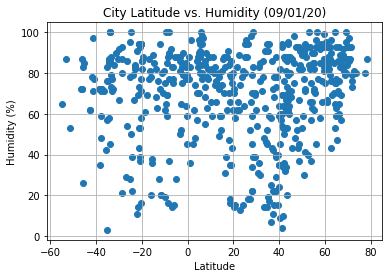

In [14]:
plt.scatter(clean_cities_df["Lat"],clean_cities_df["Humidity"])
plt.title("City Latitude vs. Humidity (09/01/20)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(linestyle="-")
plt.savefig("lat_humid_fig")
plt.show()

## Latitude vs. Cloudiness Plot

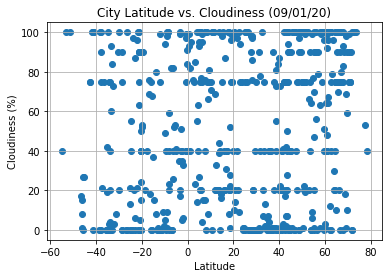

In [15]:
plt.scatter(clean_cities_df["Lat"],clean_cities_df["Cloudiness"])
plt.title("City Latitude vs. Cloudiness (09/01/20)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(linestyle="-")
plt.savefig("lat_cloud_fig")
plt.show()

## Latitude vs. Wind Speed Plot

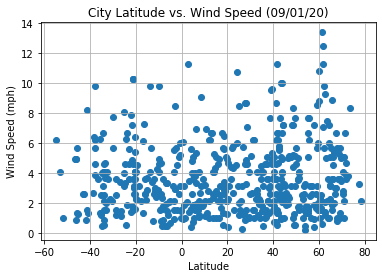

In [16]:
plt.scatter(clean_cities_df["Lat"],clean_cities_df["Wind Speed"])
plt.title("City Latitude vs. Wind Speed (09/01/20)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(linestyle="-")
plt.savefig("lat_wind_fig")
plt.show()

## Linear Regression

In [17]:
# Create Northern and Southern Hemisphere DataFrames
north_df = clean_cities_df.loc[clean_cities_df["Lat"] >= 0]
south_df = clean_cities_df.loc[clean_cities_df["Lat"] <= 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.6386811606863951


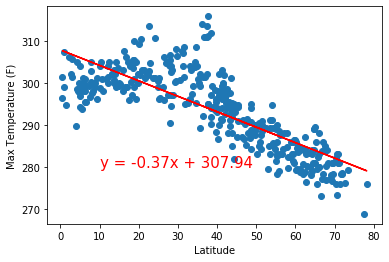

In [18]:
x_axis = north_df["Lat"]
y_axis = north_df["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)

r_sq = rvalue * rvalue

print(f"The r-squared is: {r_sq}")

plt.scatter(x_axis, y_axis)
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

regress_values = x_axis * slope + intercept
plt.plot(x_axis,regress_values,"r-")

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(10,280), fontsize = 15, color = "red")
         
plt.savefig("north_temp_regress")

plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.5492274602323332


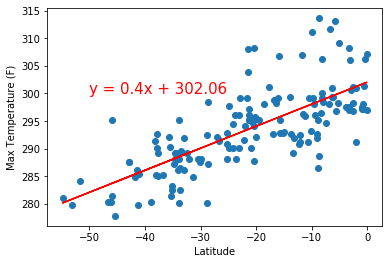

In [19]:
x_axis = south_df["Lat"]
y_axis = south_df["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)

r_sq = rvalue * rvalue

print(f"The r-squared is: {r_sq}")

plt.scatter(x_axis, y_axis)
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

regress_values = x_axis * slope + intercept
plt.plot(x_axis,regress_values,"r-")

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(-50,300), fontsize = 15, color = "red")
         
plt.savefig("south_temp_regress")

plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.022229102841043766


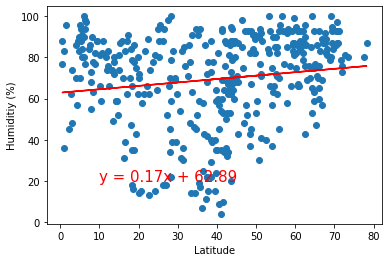

In [20]:
x_axis = north_df["Lat"]
y_axis = north_df["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)

r_sq = rvalue * rvalue

print(f"The r-squared is: {r_sq}")

plt.scatter(x_axis, y_axis)
plt.xlabel("Latitude")
plt.ylabel("Humiditiy (%)")

regress_values = x_axis * slope + intercept
plt.plot(x_axis,regress_values,"r-")

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(10,20), fontsize = 15, color = "red")
         
plt.savefig("north_humidity_regress")

plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.0007159369877159632


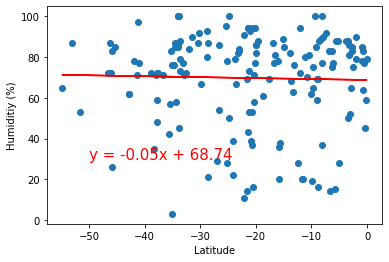

In [21]:
x_axis = south_df["Lat"]
y_axis = south_df["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)

r_sq = rvalue * rvalue

print(f"The r-squared is: {r_sq}")

plt.scatter(x_axis, y_axis)
plt.xlabel("Latitude")
plt.ylabel("Humiditiy (%)")

regress_values = x_axis * slope + intercept
plt.plot(x_axis,regress_values,"r-")

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(-50,30), fontsize = 15, color = "red")
         
plt.savefig("south_humidity_regress")

plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.006155307578832149


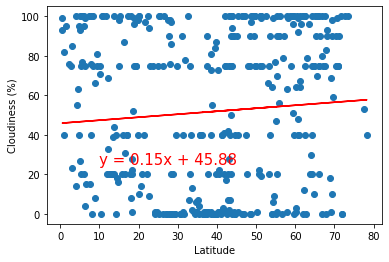

In [22]:
x_axis = north_df["Lat"]
y_axis = north_df["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)

r_sq = rvalue * rvalue

print(f"The r-squared is: {r_sq}")

plt.scatter(x_axis, y_axis)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

regress_values = x_axis * slope + intercept
plt.plot(x_axis,regress_values,"r-")

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(10,25), fontsize = 15, color = "red")
         
plt.savefig("north_cloudiness_regress")

plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.0007229584388913448


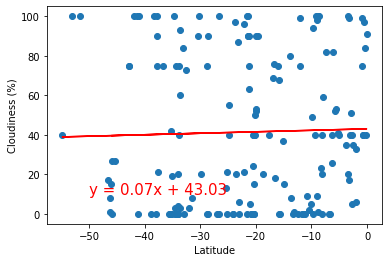

In [23]:
x_axis = south_df["Lat"]
y_axis = south_df["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)

r_sq = rvalue * rvalue

print(f"The r-squared is: {r_sq}")

plt.scatter(x_axis, y_axis)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

regress_values = x_axis * slope + intercept
plt.plot(x_axis,regress_values,"r-")

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(-50,10), fontsize = 15, color = "red")
         
plt.savefig("south_cloudiness_regress")

plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.009777828725854825


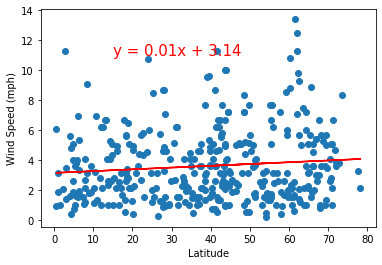

In [24]:
x_axis = north_df["Lat"]
y_axis = north_df["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)

r_sq = rvalue * rvalue

print(f"The r-squared is: {r_sq}")

plt.scatter(x_axis, y_axis)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

regress_values = x_axis * slope + intercept
plt.plot(x_axis,regress_values,"r-")

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(15,11), fontsize = 15, color = "red")
         
plt.savefig("north_wind_regress")

plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.007108734696399505


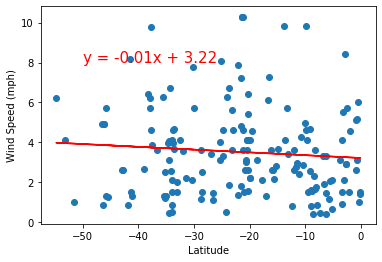

In [25]:
x_axis = south_df["Lat"]
y_axis = south_df["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)

r_sq = rvalue * rvalue

print(f"The r-squared is: {r_sq}")

plt.scatter(x_axis, y_axis)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

regress_values = x_axis * slope + intercept
plt.plot(x_axis,regress_values,"r-")

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(-50,8), fontsize = 15, color = "red")
         
plt.savefig("south_wind_regress")

plt.show()